# Аналитика в авиакомпании
## Содержание: <a id='content'></a>
1. [Изучение данных и предобработка](#research)
2. [Исследовательский анализ](#eda)
3. [Вывод](#conclusion)

### 1. Изучение данных и предобработка <a class="anchor" id="research"></a>

Загрузим необхдимые библиотеки и посмотрим на исходные данные:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# первый датасет
models = pd.read_csv('/datasets/query_1.csv')
models

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
# выведем общую информацию о таблице
models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Данные в этой таблице корректны, никаких дополнительных обработок проводить не нужно.

In [4]:
# второй датасет
cities = pd.read_csv('/datasets/query_3.csv')
cities.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [5]:
# информация о нем
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Здесь следует перевести значения столбца `average_flights` в целочисленный тип:

In [6]:
cities['average_flights'] = cities['average_flights'].astype('int64')
cities.head()

,city,average_flights
0,Абакан,3
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2


Таким образом мы изучили исходные данные. Первая таблица представляет собой результат первого запроса, который включает 8 наименований самолётов и их общее количество рейсов в сентябре 2018 года. Данные здесь не имеют пропущенных значений и некорректных типов, а значит мы можем проводить исследования по ним без предварительной обработки. Вторая таблица включает чуть более 100 городов с указанием среднего количества пребывающих за один день рейсов в августе 2018 года. В этом случае пропущенные данные так же отсутствуют, однако среднее количество рейсов представлено в формате float64 - для дальнейшего анализа мы перевели их в целочиленный тип.

### 2. Исследовательский анализ <a class="anchor" id="eda"></a>
[Назад к оглавлению](#content)

На данном этапе мы посмотрим на распределения данных и узнаем какие самолёты являются самыми популярными и узнаем, какие грода принимают наибольшее число рейсов.

Для начала выберем топ-10 городов по количеству рейсов:

In [7]:
top10_cities = (cities
                .sort_values(by='average_flights', ascending=False).
                head(10)
                .reset_index(drop=True)
               )
top10_cities

,city,average_flights
0,Москва,129
1,Санкт-Петербург,31
2,Новосибирск,17
3,Екатеринбург,11
4,Красноярск,11
5,Пермь,10
6,Ростов-на-Дону,10
7,Брянск,10
8,Ульяновск,9
9,Советский,9


Автоматизируем процесс построения графиков при помощи функции. На вход она будет принимать таблицу и возвращать отсортированные значения по убыванию в виде столбчатой диаграммы. Так как в таблице `cities` свыше 100 значений, для лучшей читаемости разделим графики пополам: добавим необязательный параметр *tail*, при истинном значении которого будет выводиться вторая половина.

In [8]:
def plot(data, tail=False):
    columns = data.columns #выделяем названия столбцов для сортировки    
    if tail==False:    
        (data
            .sort_values(by=columns[1], ascending=False)
            .set_index(columns[0]) # добавление индекса позволит автоматически указывать значения столбца в качестве названия столбцов графика
            .head(50)
            .plot(kind='bar', figsize=(12, 6))
        )
    else:
         (data
        .sort_values(by=columns[1], ascending=False)
        .set_index(columns[0])
        .tail(51)
        .plot(kind='bar', figsize=(10, 5))
         )

Применим функцию к таблице `models`:

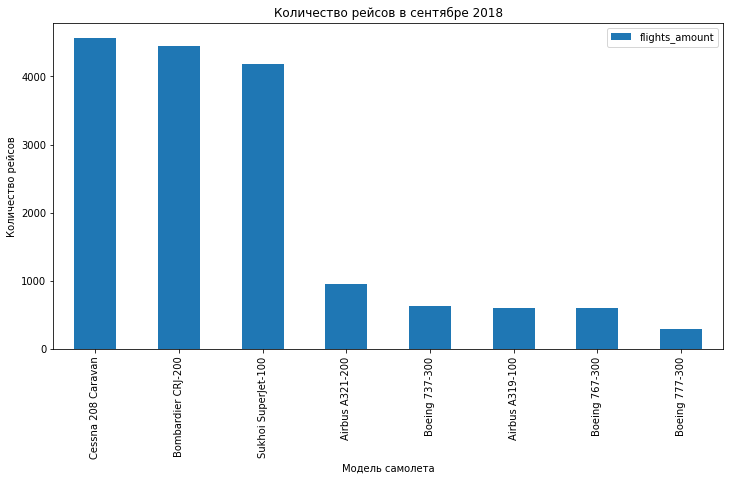

In [9]:
plot(models)
plt.title('Количество рейсов в сентябре 2018')
plt.xlabel('Модель самолета')
plt.ylabel('Количество рейсов')
plt.show()

Наибольшее число рейсов было совершено на самолете Cessna 208 Caravan - это легкий одномоторный самолет общего назначения, который эксплуатируется несколькими российскими региональными авиакомпаниями. Вероятнее всего, такая популярность обусловлена частым выполнением грузовых и чартерных рейсов. Немногим меньше количество рейсов на самолетах Bombardier CRJ-200 и Sukhoi SuperJet-100, причины их популярности могут быть те же. Аэробусы и Боинги уступают по этому показателю в 4 раза, данные самолеты чаще используются в регулярных пассажирский перевозках.

Далее рассмотрим распаределение городов:

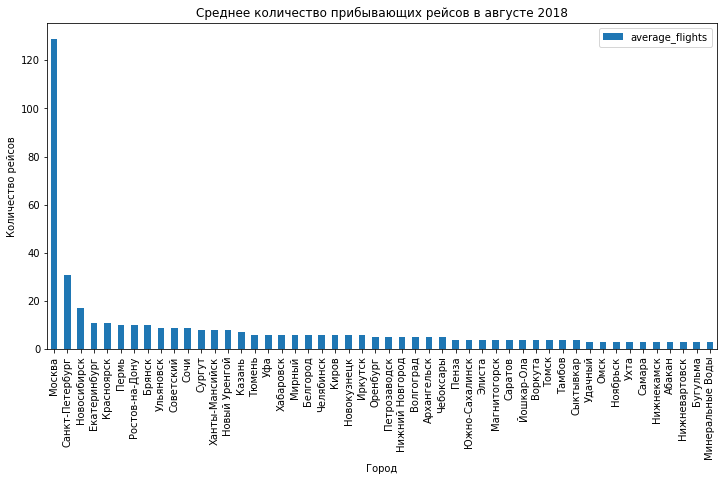

In [10]:
plot(cities)
plt.title('Среднее количество прибывающих рейсов в августе 2018')
plt.xlabel('Город')
plt.ylabel('Количество рейсов')
plt.show()

Среднее количество рейсов в Москву более чем в 4 раза превышает этот показатель в Санкт-Петербурге, находящийся на втором месте по популярности. В целом выделяется тройка городов, которую замыкает Новосибирск, дальше показатели идут примерно равные и не превышают 15 рейсов в день.

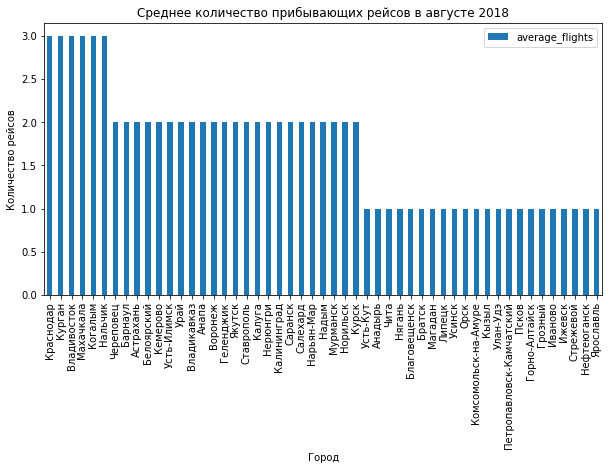

In [11]:
plot(cities, True)
plt.title('Среднее количество прибывающих рейсов в августе 2018')
plt.xlabel('Город')
plt.ylabel('Количество рейсов')
plt.show()

Для второй половины данных максимальное среднее количество рейсов в день равняется 3. Мы можем заключить, что из всех городов очень мало популярных направлений - примерно шестая часть в среднем принимает около 10 рейсов в день, для большинства же городов этот показатель сильно меньше.

Отдельно рассмотрим график для 10 наиболее популярных городов:

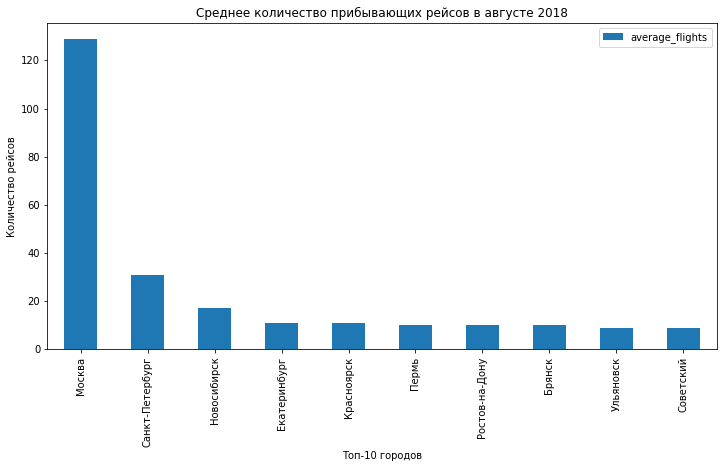

In [12]:
plot(top10_cities)
plt.title('Среднее количество прибывающих рейсов в августе 2018')
plt.xlabel('Топ-10 городов')
plt.ylabel('Количество рейсов')
plt.show()

В топ-10 городов, помимо указанной выше тройки, также вошли Екаткеринбург, Красноярск, Пермь, Ростов-на-Дону, Брянск, Ульяновск и Советский - распределение в них практически одинаковое.

### Вывод <a class="anchor" id="conclusion"></a>
[Назад к оглавлению](#content)

Таким образом мы провели исследования выполняемых авиакомпанией рейсов и попытались понять предпочтения пользователей, покупающих билеты на те или иные направления.  

В первой части анализа мы проверяли гипотезу о влиянии проведения крупных фестивалей на количество рейсов. Для этого мы написали парсер для сбора с сайта данных о 11 крупнейших фестивалях 2018 года. После этого изучили предоставленную базу данных, в которых была предоствлена информация о рейсах, приобретенных билетах, аэропортах и самолётах, и проанализировали спрос пассажиров на рейсы в города, где эти фестивали проходят. По результатам такого анализа мы не выявили изменения количества рейсов в дни проведения выделенных мероприятий - количество приобретенных билетов было примерно таким же, как и в остальные дни.  

Во второй части мы проводили исследования результатов двух запросов, полученных ранее: в одном содержалась информация по количеству рейсов для каждой модели самолетов в сентябре 2018 года, в следующем - среднее количестве рейсов, прибывающих в различные города за день в августе 2018 года. Данные в указанных запросах были полные и корректные, за исключением среднего количества рейсов во второй таблице, указанные с дробной частью - их мы перевели в целочисленный тип.  
После построения распределений мы выяснили, что наибольшее число рейсов было совершено на самолете Cessna 208 Caravan - легкий одномоторный самолет общего назначения. Такая популярность может быть обусловлена частым выполнением грузовых и чартерных рейсов. Почти такое же количество рейсов было совершено на самолетах Bombardier CRJ-200 и Sukhoi SuperJet-100, причины их популярности могут быть те же. Аэробусы и Боинги уступают по этому показателю в 4 раза.  
Исходя из распределения среднего количества рейсов в день по городам, московское направление более чем в 4 раза превышает этот показатель в Санкт-Петербурге, находящийся на втором месте по популярности. Обособленно выделяется тройка городов, которую замыкает Новосибирск, дальше показатели идут примерно равные и не превышают 15 рейсов в день. Помимо них в топ-10 городов вошли Екаткеринбург, Красноярск, Пермь, Ростов-на-Дону, Брянск, Ульяновск и Советский - распределение в них практически одинаковое. В целом, из всех городов очень мало популярных направлений - примерно шестая часть в среднем принимает около 10 рейсов в день, для большинства же городов этот показатель сильно меньше.

Исходя из приведенного анализа, можно выделить несколько рекомендаций. Во-первых, имеет смысл пересмотреть необходимость использования наименее популярных самолетов: так как число полётов на Боингах и Аэробусах сильно меньше, вывод из штата одной или нескольких моделей поможет снизить затраты на их обслуживание. Во-вторых, компании следует развивать направления, входящие в топ-10 - несмотря на то, что они считаются популярными, количество рейсов в них достаточное малое.